In [1]:
!nvidia-smi

Tue May 16 06:01:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="egj0PHWTo8XsYIVvK4BD")
project = rf.workspace("rcoem-k2vsd").project("lane-detection-annotation-final")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Lane-Detection-Annotation-Final-1 in yolov8:: 100%|██████████| 604/604 [00:00<00:00, 2000.05it/s]


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 34.2MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Lane-Detection-Annotation-Final-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=to

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1684216944.7ebce6479d5f.496.0  train_batch2.jpg
F1_curve.png					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   val_batch1_labels.jpg
R_curve.png					   val_batch1_pred.jpg
results.csv					   weights
results.png


/content


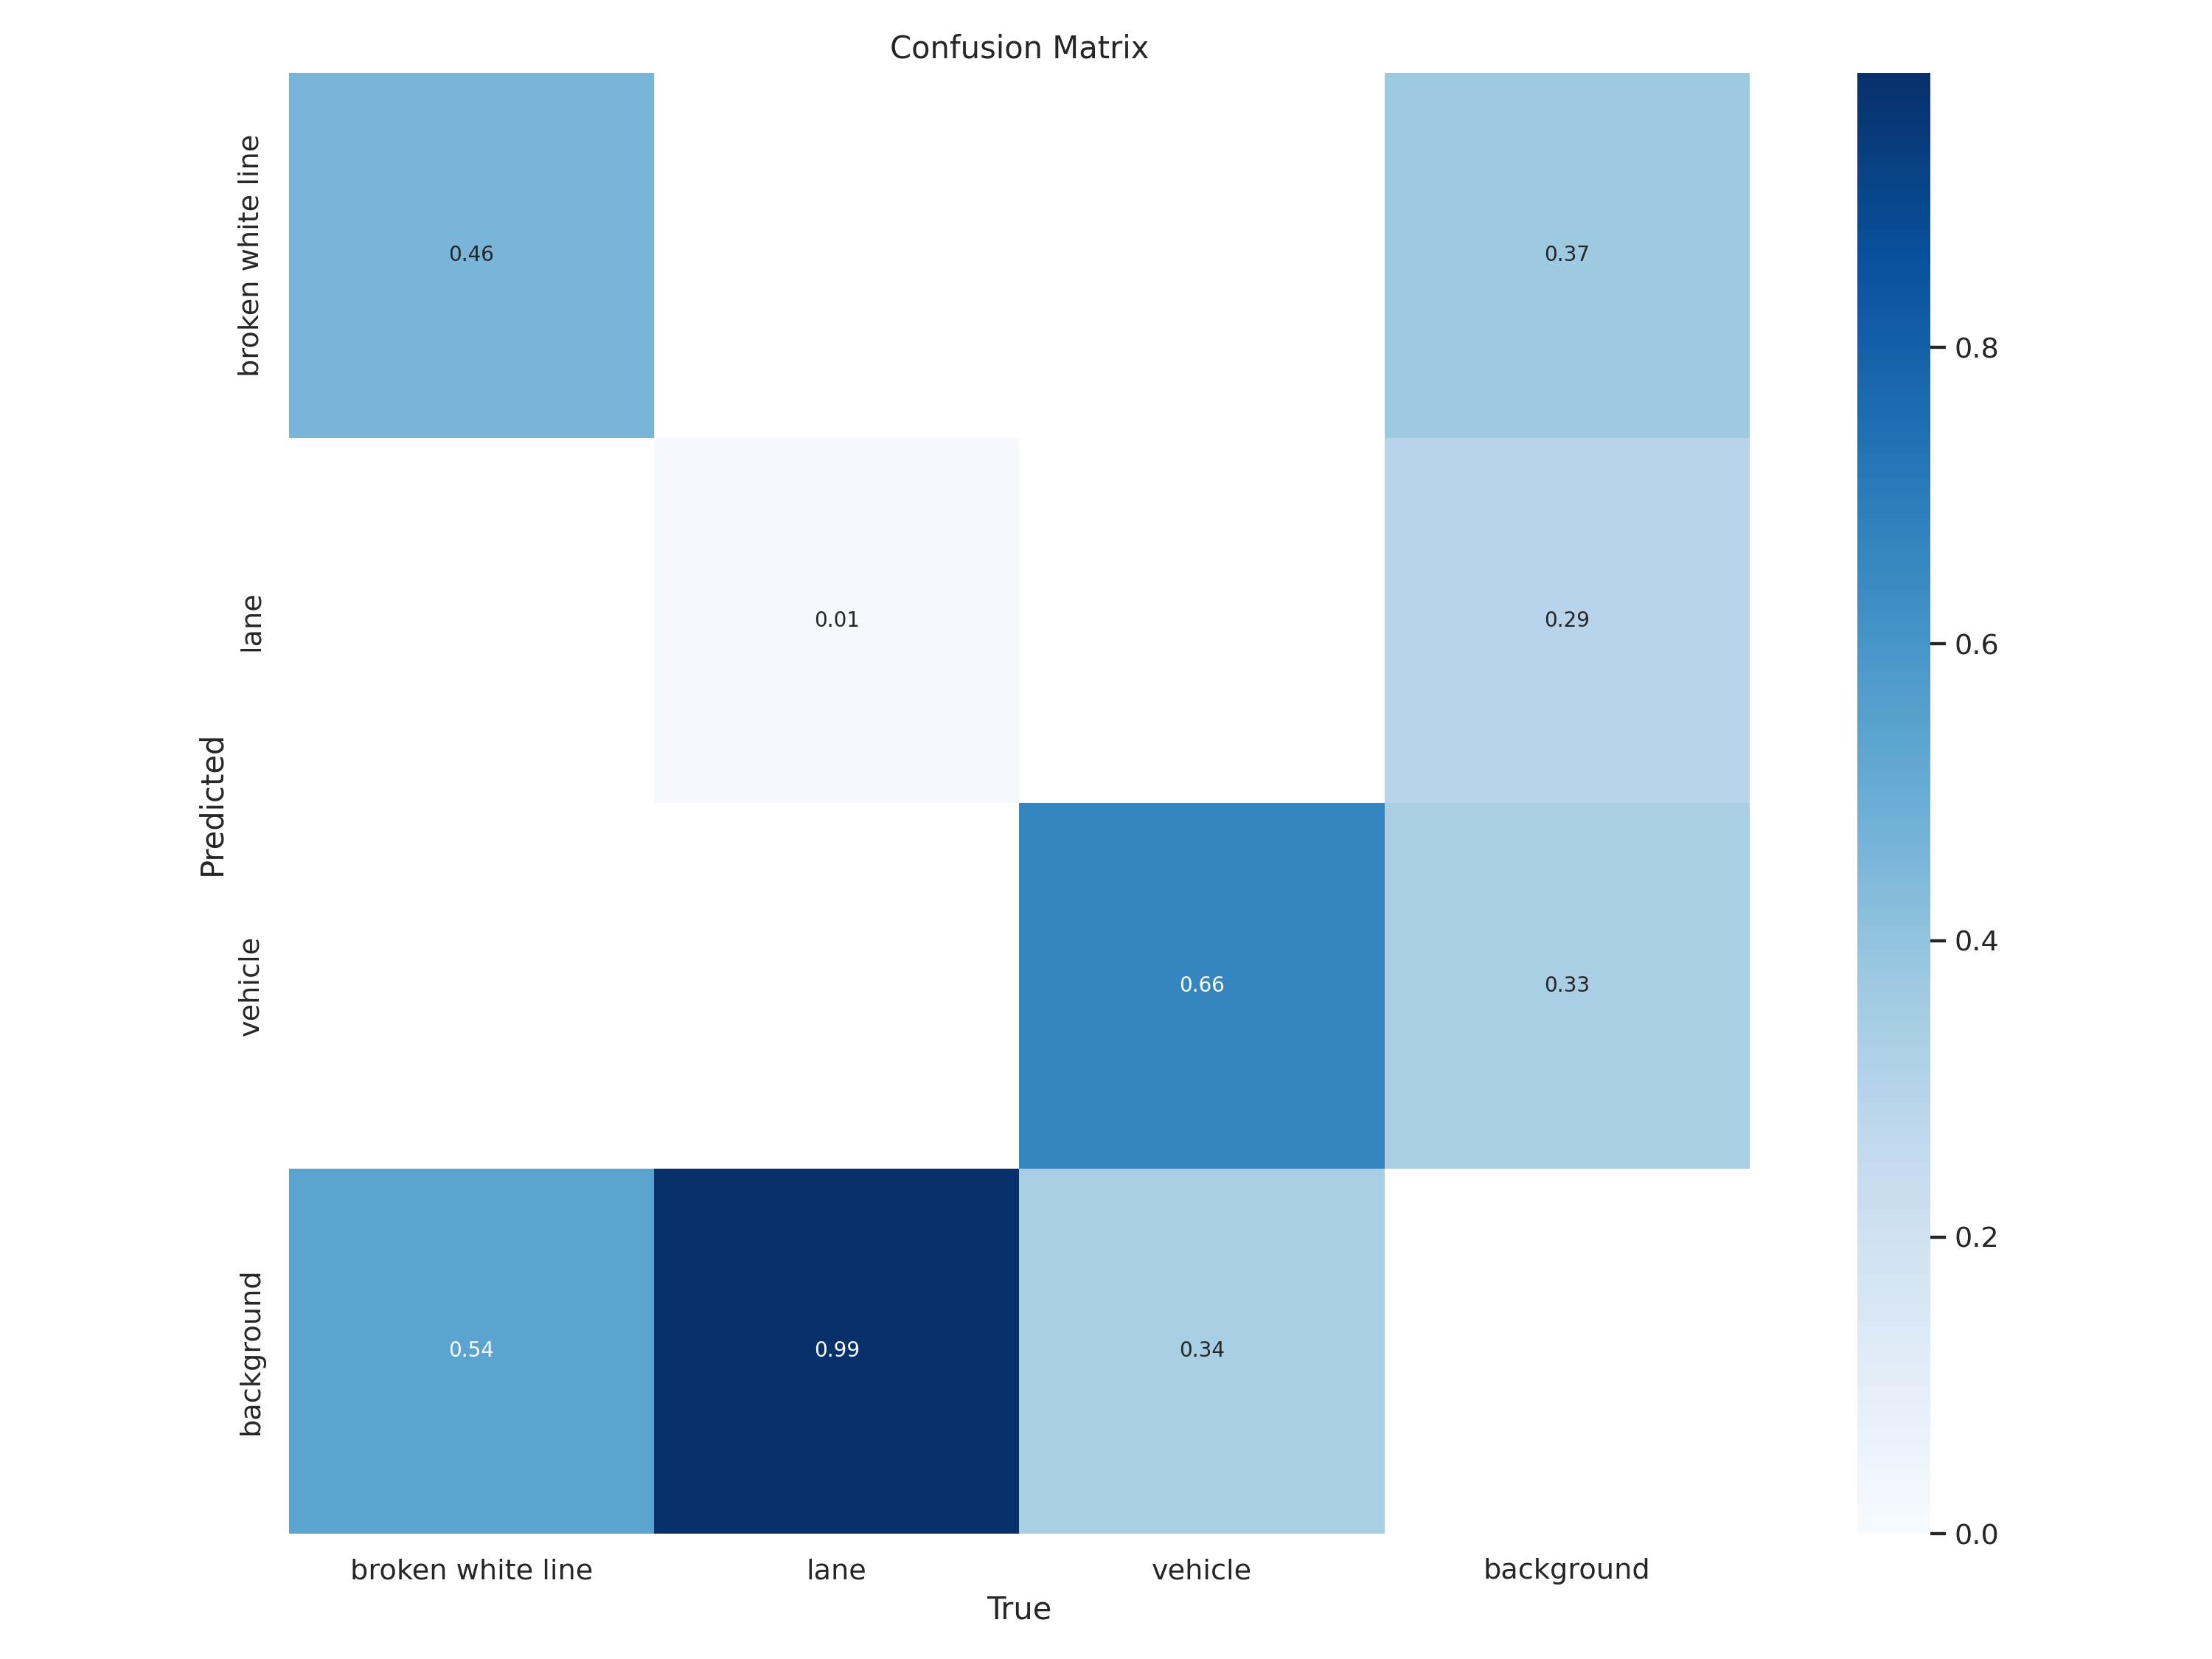

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


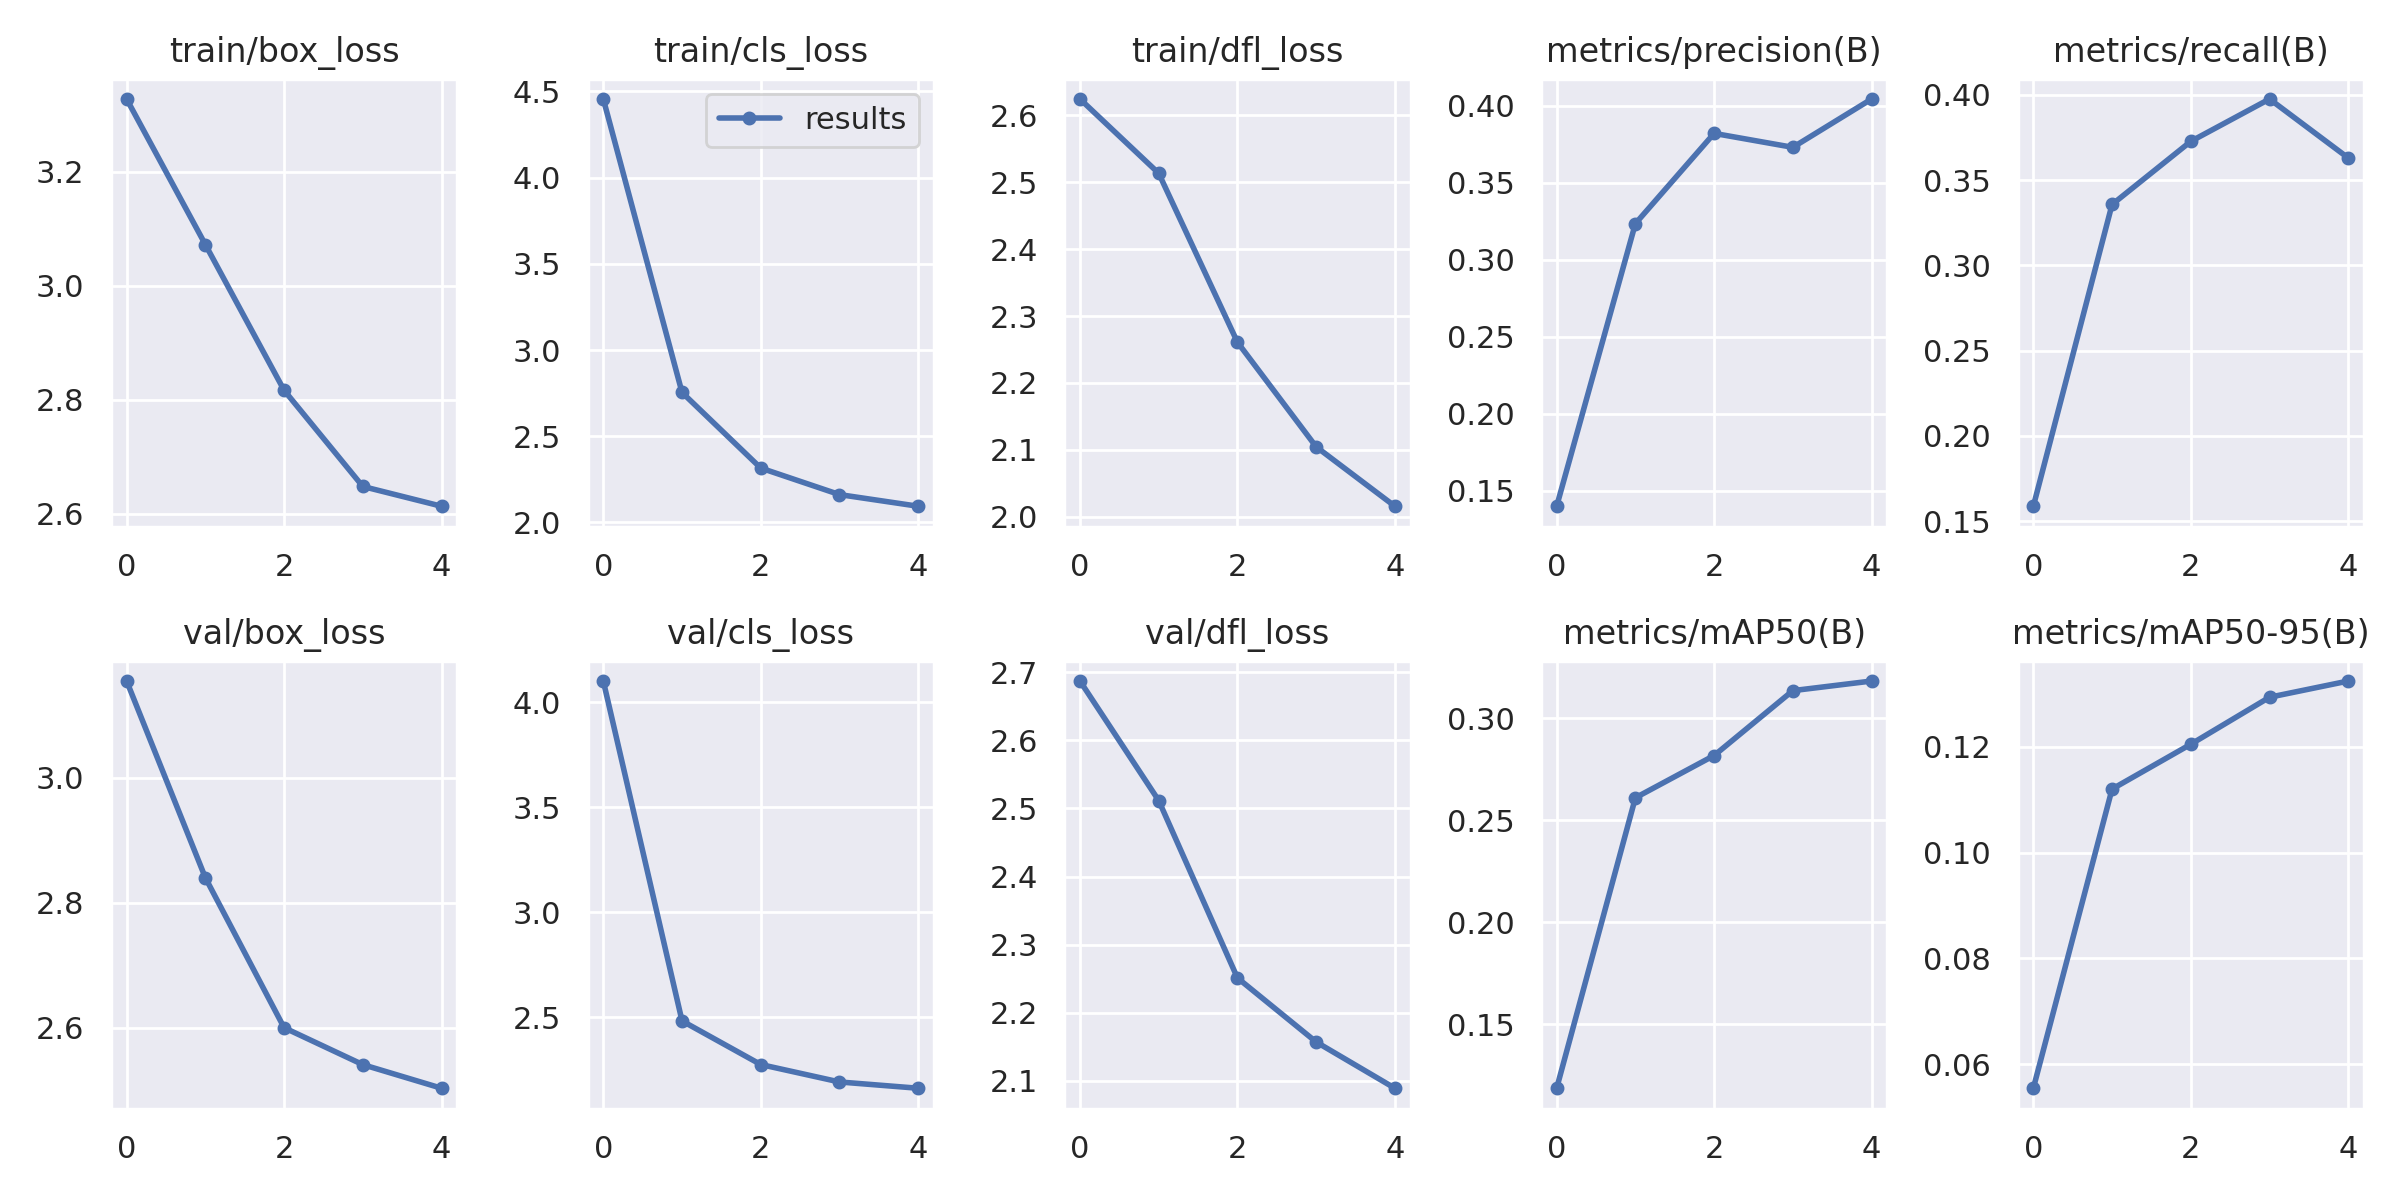

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


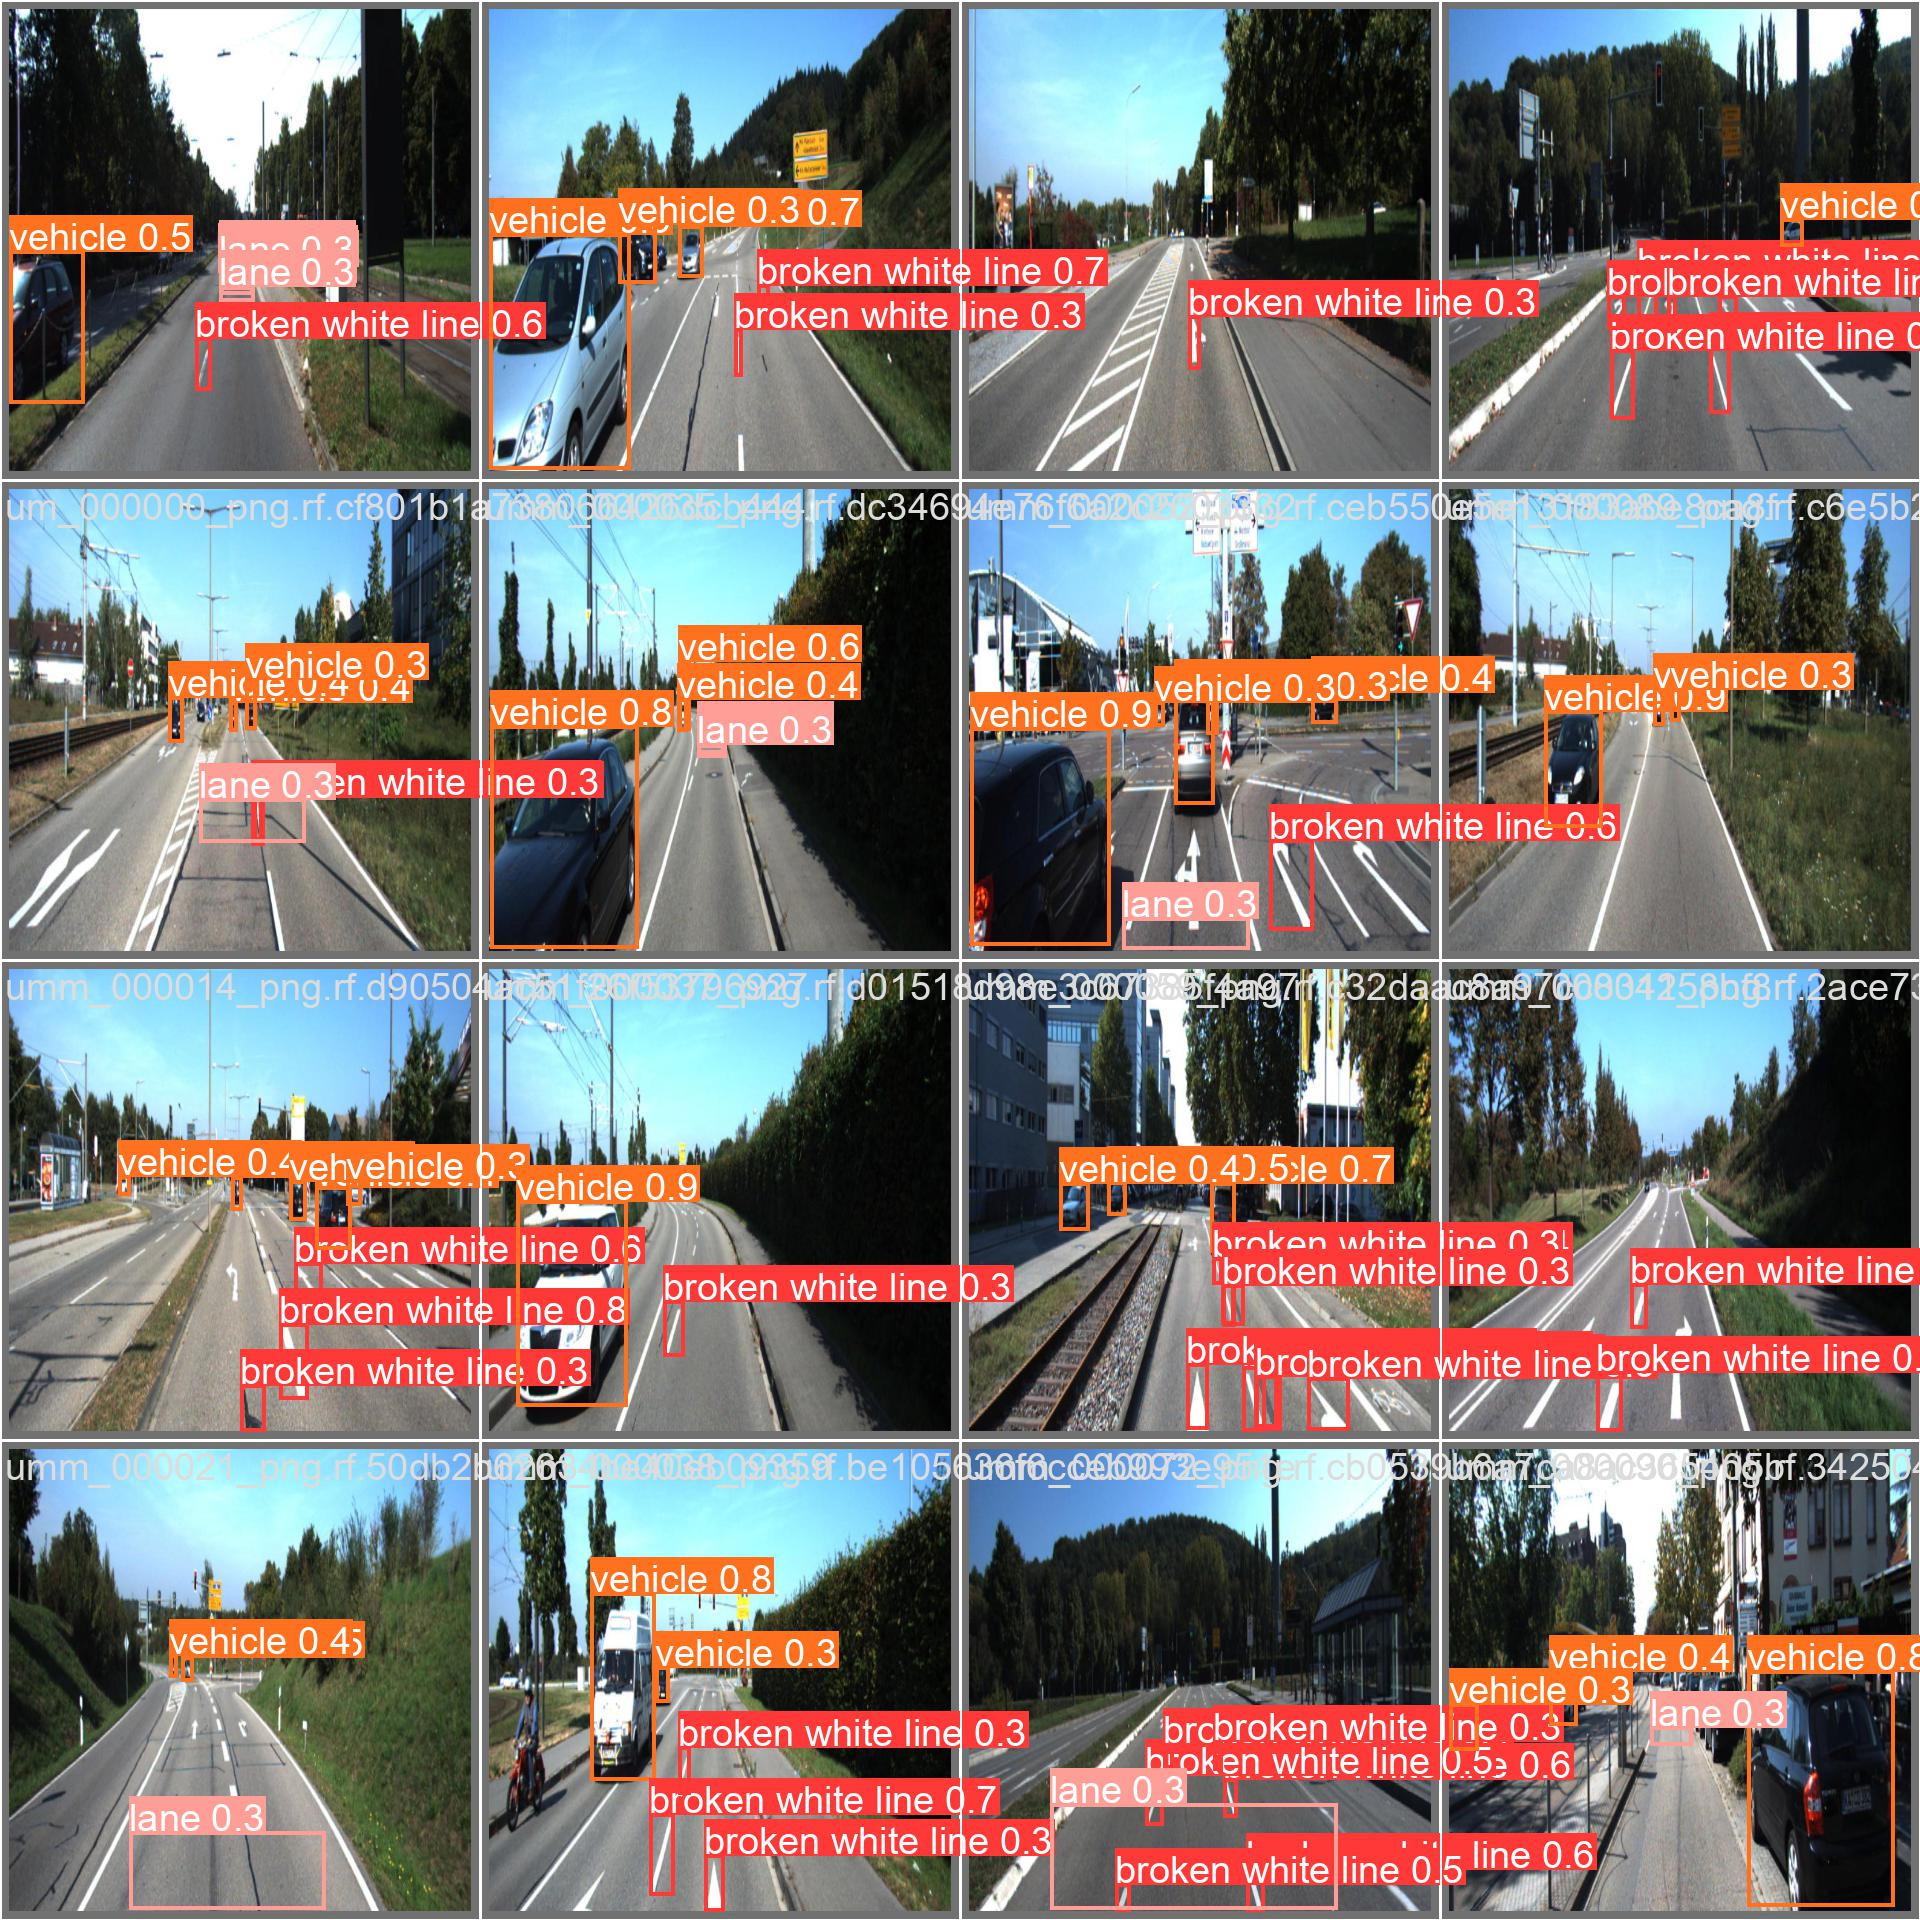

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-16 06:04:51.472394: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 06:04:52.356915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Lane-Detection-Annotation-Final-1/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:07<00:00,  1.85s/it]
                   all         59       1141      0.406      0.368       0.32      0.132
     broken w

## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-05-16 06:05:22.498693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 06:05:23.385479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/30 /content/datasets/Lane-Detection-Annotation-Final-1/test/images/um_000005_png.rf.240efdceb1fe400a641d4a5ba0b8a825.jpg: 800x800 2 broken white lines, 2 vehicles, 24.6ms
image 2/30 /content/datasets/Lane-Detection-Annotation-Final-1/test/images/um_000005_png.rf.f5ae3c2b49467afd1ce07438a83f27c4.jpg: 800x800 4 vehicles, 24.7ms
image 3/30 /content/datasets/Lane-Detection

**NOTE:** Let's take a look at few results.

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [14]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [15]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on um_000073_png.rf.658de3e9751cdf2aae176a70e213edb3.jpg


{'predictions': [{'x': 298.0,
   'y': 527.5,
   'width': 130.0,
   'height': 67.0,
   'confidence': 0.5452560186386108,
   'class': 'lane',
   'image_path': '/content/datasets/Lane-Detection-Annotation-Final-1/test/images/um_000073_png.rf.658de3e9751cdf2aae176a70e213edb3.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 230.5,
   'y': 473.5,
   'width': 21.0,
   'height': 65.0,
   'confidence': 0.5324286818504333,
   'class': 'broken white line',
   'image_path': '/content/datasets/Lane-Detection-Annotation-Final-1/test/images/um_000073_png.rf.658de3e9751cdf2aae176a70e213edb3.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 302.0,
   'y': 596.0,
   'width': 158.0,
   'height': 66.0,
   'confidence': 0.5100046396255493,
   'class': 'lane',
   'image_path': '/content/datasets/Lane-Detection-Annotation-Final-1/test/images/um_000073_png.rf.658de3e9751cdf2aae176a70e213edb3.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 297.5,
   'y': 470.0,
   'width': 1

running inference on um_000044_png.rf.12fb36beb2727d0ee2185e772fa42c4f.jpg


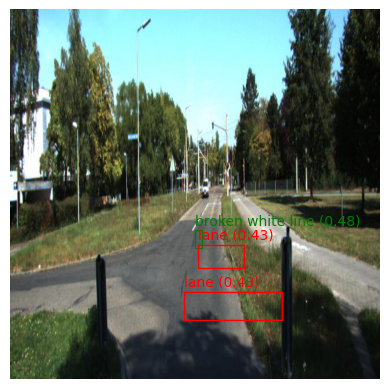

In [16]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# ...

test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

image_path = test_set_loc + random_test_image
pred = model.predict(image_path, confidence=40, overlap=30).json()

# Load and display the image
image = Image.open(image_path)
plt.imshow(image)

# Define a color map for different labels
color_map = {'lane': 'red', 'vehicle': 'blue', 'broken white line': 'green'}

# Display the predicted bounding boxes, class labels, and confidence scores
for obj in pred['predictions']:
    x = obj['x']
    y = obj['y']
    width = obj['width']
    height = obj['height']
    confidence = obj['confidence']
    class_name = obj['class']

    # Get the color for the current label
    color = color_map.get(class_name, 'red')

    # Create a rectangle patch with the specified color
    bbox = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor=color, facecolor='none')

    # Add the bounding box to the plot
    plt.gca().add_patch(bbox)

    # Add the class label and confidence score as a text label with the specified color
    plt.text(x, y - 10, f'{class_name} ({confidence:.2f})', color=color)

plt.axis('off')
plt.show()

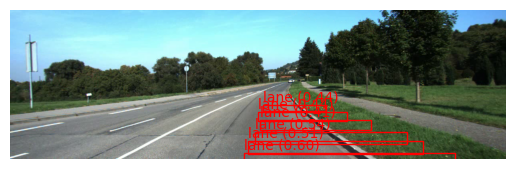

In [20]:
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from IPython.display import clear_output

# ...

video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)

# Define a color map for different labels
color_map = {'lane': 'red', 'vehicle': 'blue', 'broken white line': 'green'}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference on the frame
    pred = model.predict(frame, confidence=40, overlap=30).json()

    # Convert the frame from BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame with annotated bounding boxes
    plt.imshow(frame_rgb)

    # Display the predicted bounding boxes, class labels, and confidence scores
    for obj in pred['predictions']:
        x = obj['x']
        y = obj['y']
        width = obj['width']
        height = obj['height']
        confidence = obj['confidence']
        class_name = obj['class']

        # Get the color for the current label
        color = color_map.get(class_name, 'red')

        # Create a rectangle patch with the specified color
        bbox = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor=color, facecolor='none')

        # Add the bounding box to the plot
        plt.gca().add_patch(bbox)

        # Add the class label and confidence score as a text label with the specified color
        plt.text(x, y - 10, f'{class_name} ({confidence:.2f})', color=color)

    plt.axis('off')
    plt.show()
    clear_output(wait=True)

cap.release()
